In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd
from scipy import stats

### Lecture 21:

- We will work with directional data using rose diagrams and stereonets



### Directions 

Earth science is filled with directional data.  Glacial striations,  bedding planes, fault orientations, and geomagnetic field vectors are all forms of directional data.  Dealing with directional data is quite different than other kinds of data, like lists of numbers, and we need special plots.  Unless all the directions are in a single plane, if is often useful to project something that is inherently 3D onto a 2D plot.  

To get started, we will consider  directions in the horizontal plane, which are already 2D (no vertical component).  Examples would be current directions in ancient rivers, or the direction of wind on the surface of the Earth.  

One early fascination in Earth Science was the evidence for past glaciations.   There are many clues to past glaciations (moraines, eskers, U-shaped valleys, etc.), but one that stands out as an interesting example of directional data is glacial striations.  As glaciers flow over the surface of the Earth, they scratch it, making what are known as _striations_.  When the ice melts back (as it is doing very rapidly), the striations remain as clues to their past movements.  

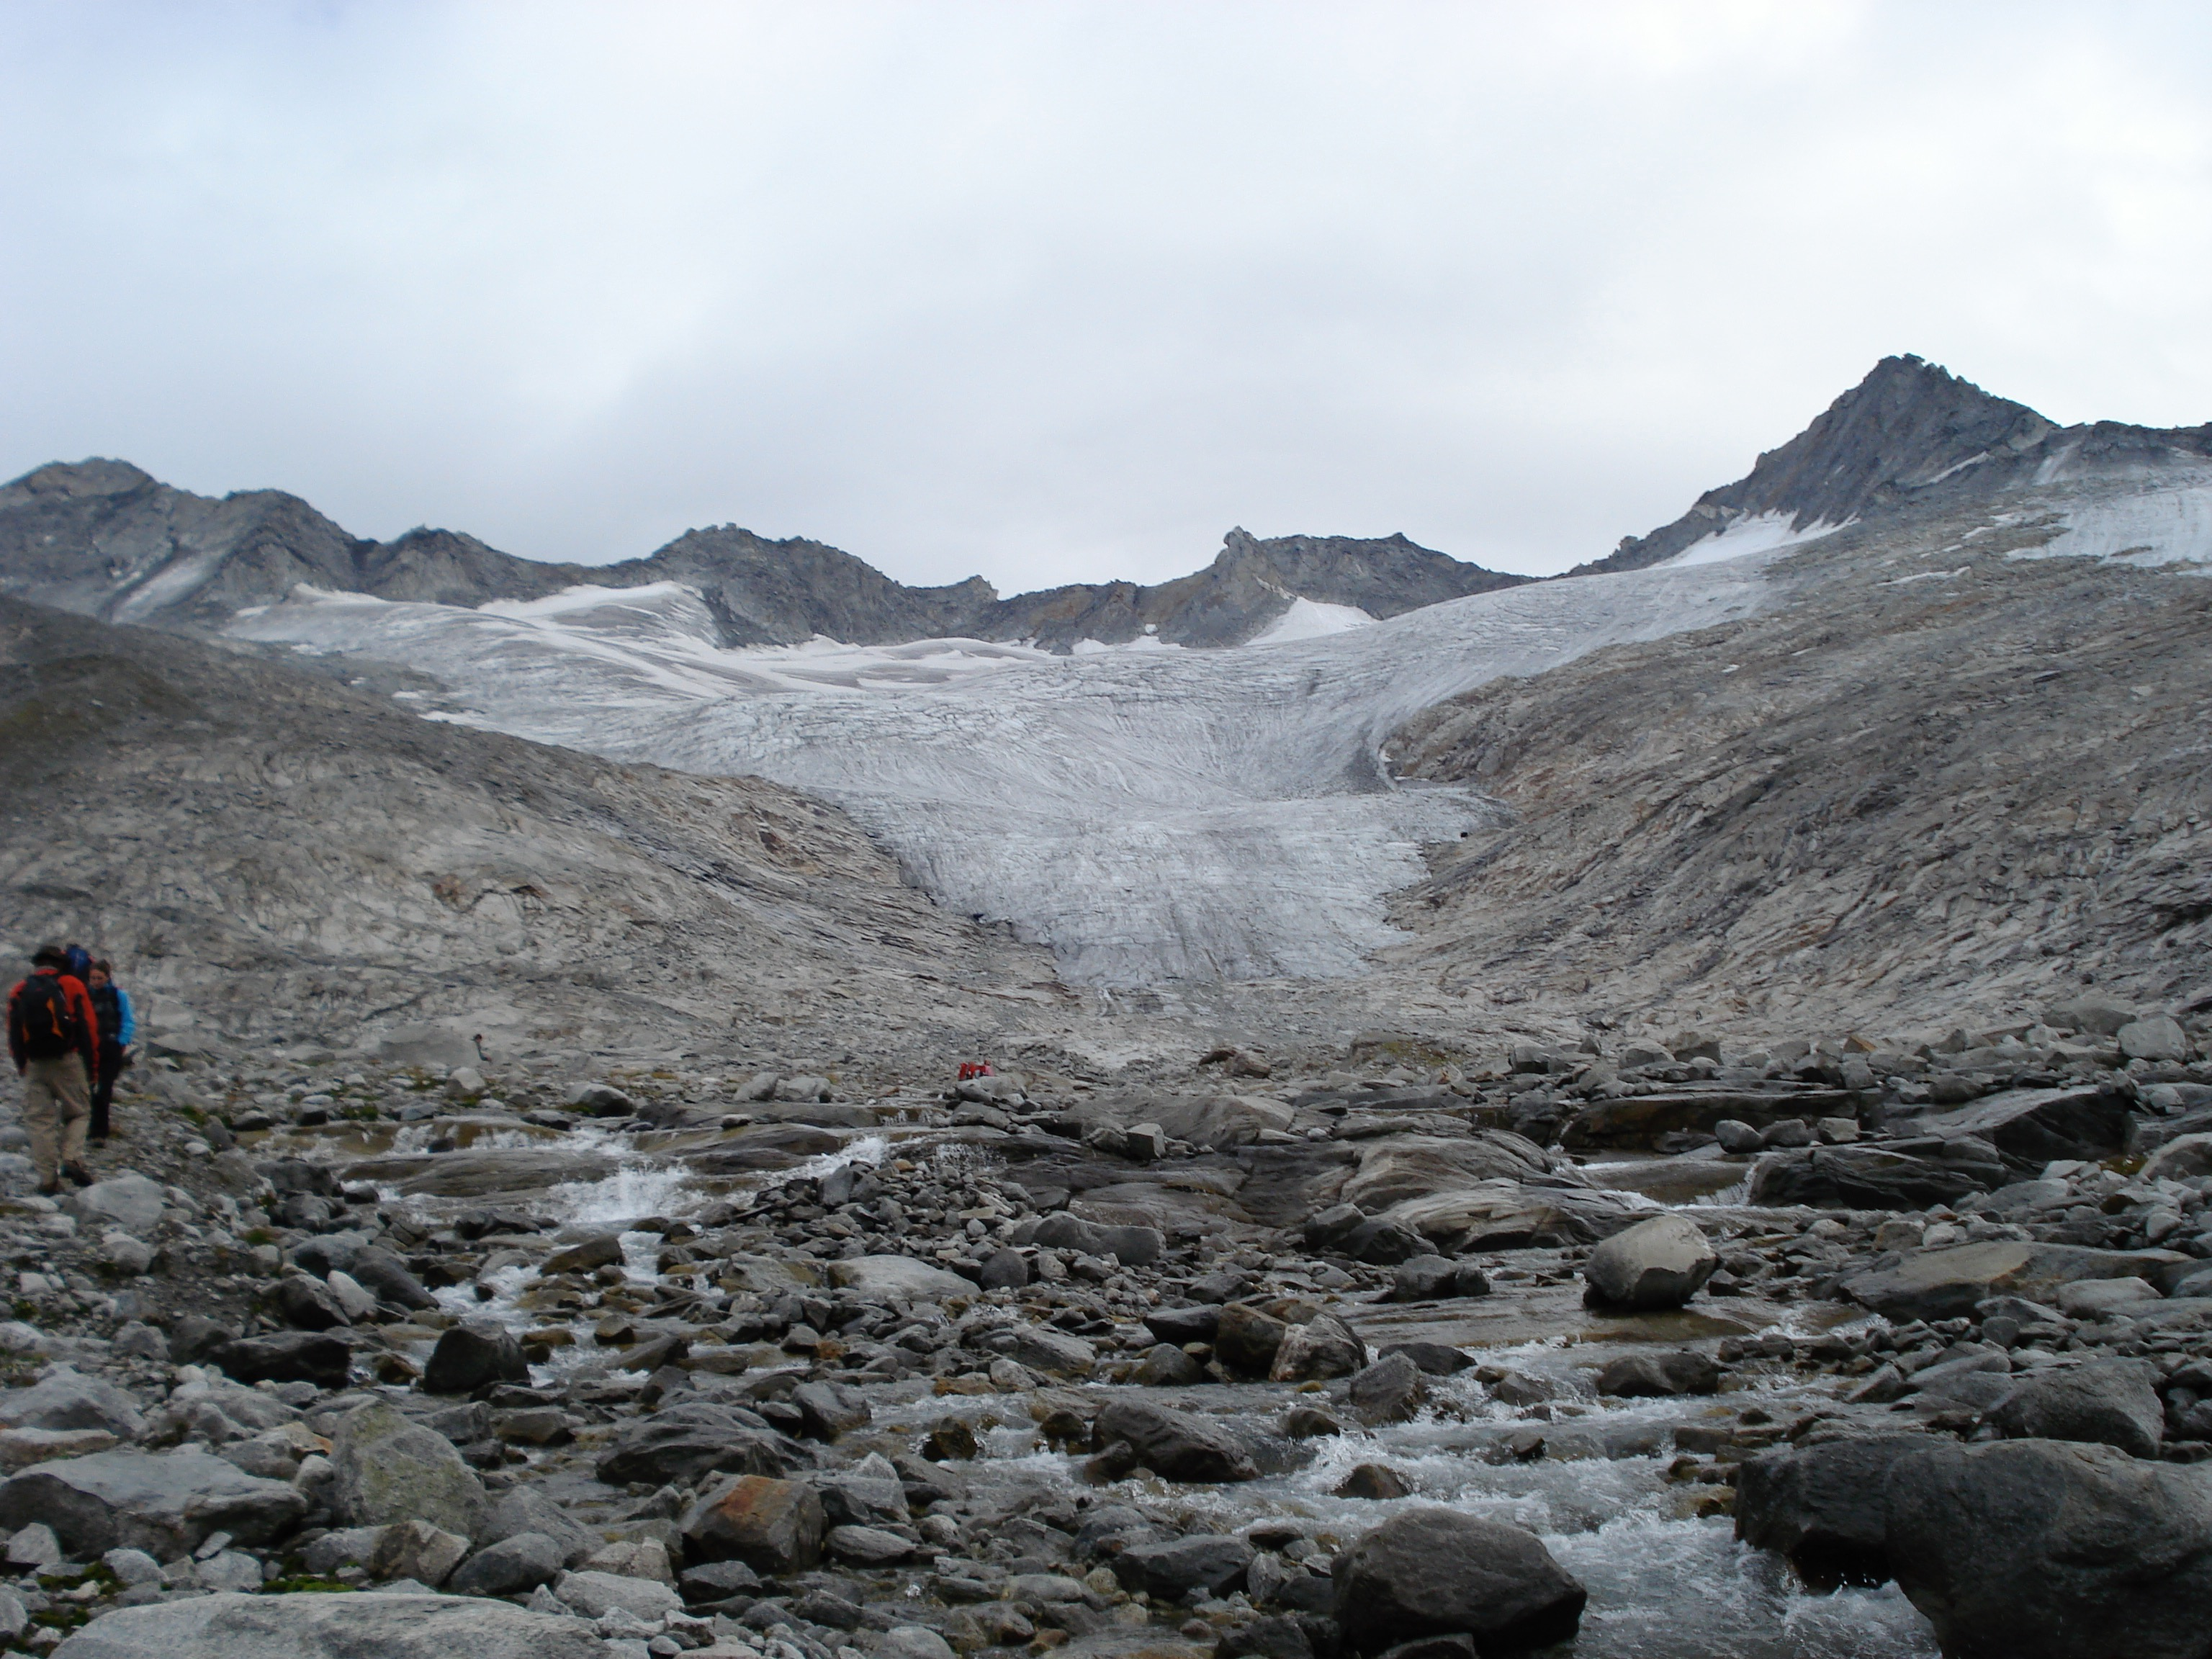

In [2]:
Image(filename='Figures/glacier.jpg')

_[Figure from a Stauxigel family vacation near where the "Iceman", Utzi, was found.  :)]_

There can be several generations of striations as the glaciers come and go.  Glaciologists measure their orientations with a compass.  Some striations will cut across others so you can work out the age relations.   

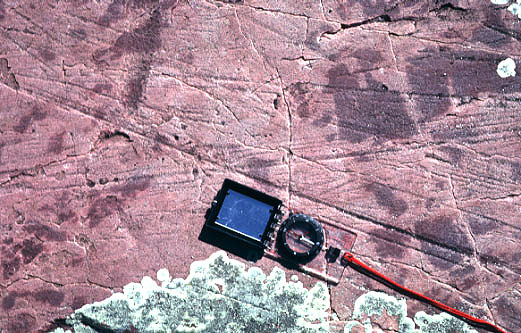

In [4]:
Image(filename='Figures/striations.jpg')

_Figure from:_ [http://academic.emporia.edu/aberjame/ice/lec01/lec1.htm.](http://academic.emporia.edu/aberjame/ice/lec01/lec1.htm)


While you can certainly plot directional data as a histogram, 2D directional data are  often plotted as a _rose diagram_.  Rose diagrams are like histograms, but are around a circle.    

To learn about rose diagrams, we can 'make up'  some data like we did in Lecture 15 and 16.   In those lectures you learned how to simulate normally distributed data sets drawn from a distribution with some mean, $\mu$  and  a standard deviation ($\sigma$).  Now we want to apply this to make some simulated data for directions.  



### Application to glacial striations

Let's say that a glaciologist measured a bunch of striations from two different glaciations.  The youngest was oriented approximately 45$^{\circ}$ with a $\sigma$ of about 10$^{\circ}$ and an older set  set has a mean of 130$^{\circ}$ and a standard deviation of 15.  

To simulate this problem, we can simulate 100 fake data points for each of these situations using  **stats.norm( )** and the **.rvs( )** method as we learned in Lecture 15.    


In [5]:
striations_1=stats.norm(45,10).rvs(100)
striations_2=stats.norm(140,15).rvs(100)

We can plot our two different data sets on a histogram:

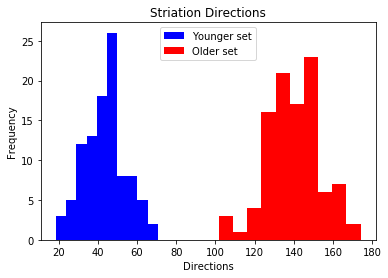

In [6]:
plt.hist(striations_1,facecolor='blue',label='Younger set') 
plt.hist(striations_2,facecolor='red',label='Older set') 
plt.xlabel('Directions')
plt.ylabel('Frequency')
plt.title('Striation Directions')
plt.legend();

### Rose diagrams

Histograms, while lovely,  don't really give you a feel for the directions. As geologists, we like to make plots that convey the most information with the least amount of effort for the viewer.  2D directional data are much better represented as 'rose diagrams', which are really just histograms plotted around a circle. They are also known as _polar_ projections as they could be used to make a map of the Earth looking down at one of the poles.  

We will follow these steps: 

- For rose diagrams, we will create a  plot instance (called **fig**) with the **plt.subplot( )** function.  We make it a _polar_ plot by setting the **polar** keyword to 'True'. 
- The _polar_ type of subplot has funny coordinates set as default, at least for geologists.  The orientations go around counterclockwise instead of clockwise (like map directions). To make it seem more normal for geologists,  we have to switch around the directions to geographic coordinates.  We do this with the **fig.set_theta_direction(-1)** function where the '-1' tells **matplotlib** that we want the numbers to go around clockwise, instead of the default (which for some unknown reason goes counter clockwise).  
- We also have to put '0' at the top of the diagram (because it is 'North' in Earth Science).  We do that with the **fig.set_theta_zero_location('N')** call, which tells **matplotlib** to put 0 on top (instead of on the right side which is the default).  
-  We have to define some bins, sort of like histograms but around the face of the clock, and count up how many directions are in each bin.  We will use a bin size of 10$^{\circ}$.  Fortunately, **plt.hist( )** will count up the number of striations in each bin for us!  And if we use the **plt.clf( )** function (which stands for 'clear figure', we don't have to look at the plot again.  
- We will use the  plot function **plt.bar( )** which normally makes bar charts (remember lecture on the composition of the crust?), but will make rose diagrams if the plot is _polar_.
- Finally, we will plot the data on the figure instance. 

Let's start with **plt.hist( )** to count up the number in each bin for each set of striations. 

In [7]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequence of


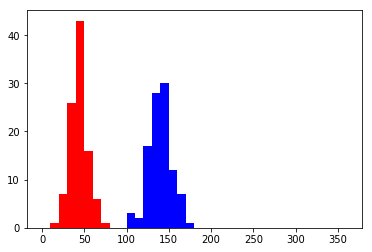

In [8]:
width=10 # width of the azimuthal bins
binarray=np.arange(0,360+width,width) # make an array to use for bins in plt.hist
counts_1,bins,patches=plt.hist(striations_1,bins=binarray,color='red') # get back the counts for the first set
counts_2,bins,patches=plt.hist(striations_2,bins=binarray,color='blue'); # ditto second set


A few more things.  **plt.bar( )** needs an array of widths that is same same length as our count arrays but with the width (in radians) and also the bin arrays have to be in radians too!  So we need to delete the last bin from binarray and make arrays in radians. To do that we can use the **Numpy** function **radians( )**. 



In [9]:
bins=binarray[0:-1] # delete the last bin
thetas=np.radians(bins) # convert the binarray to radians.  
widths=np.radians(np.ones(len(thetas))*width) # make the widths array

Now we are ready to make the plot.  New things here are: 
- to make a polar plot, set **polar** to **True** when making the figure instance (called _fig_ below). 
- by default, the coordinates go around counterclockwise in **matplotlib** figures (don't ask me why), so we have to change the way the directions go around to make it the way we Earth Scientists think about things (with the **fig.set_theta_direction(-1)** call.
- also, weirdly, **matplotlib** thinks that 0 (our North) goes to the right.  We like it at the top of the figure, so we have to set the **.set_theta_zero_location** to "N".  

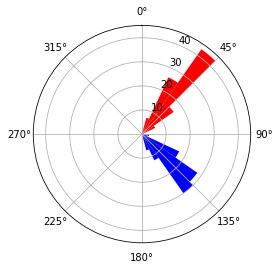

In [10]:
# make the figure instance
fig = plt.subplot(111, polar=True) # Specify polar axes
# set the coordinates the way we want them
fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
fig.set_theta_zero_location("N") # Specify 0-degrees as North
# use the polar "bar" plot.   
fig.bar(thetas, counts_1, width=widths, bottom=0,color='red')
fig.bar(thetas, counts_2, width=widths, bottom=0,color='blue');


You can see the same clusters of directions (with the same color scheme) as in the histogram, but with the rose diagram, it makes more sense geologically (if you are used to looking at maps).  


But.  While rose diagrams are great for plotting directions that lie within the horizontal plane, most directional data in Earth Science do not fall in the horizontal plane.    There is some angle with respect to the horizontal. We will call that angle the 'plunge' ($Pl$ in figure below) and the  angle in the horizontal plane with respect to true north is the 'azimuth' ($Az$).   



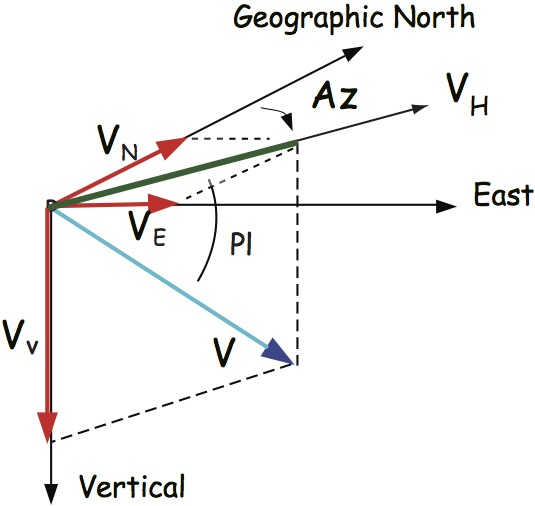

In [11]:
Image(filename='Figures/coordinates.jpg',width=300)

[Figure modified from Essentials of Paleomagnetism by Tauxe et al.,(2010): https://earthref.org/MagIC/books/Tauxe/Essentials/](https://earthref.org/MagIC/books/Tauxe/Essentials/)


### Equal area and equal angle projections

Examples of directional data are locations on the surface of the Earth (latitude and longitude),  the poles to tilted beds,  magnetic field vectors,  axes of crystals in rocks, or focal mechanisms in seismology (those beach balls).  These data would not work as histograms or rose diagrams but require some way of mapping a 3D vector onto a 2D surface (like a piece of paper).  

There are many projections that can represent 3D vectors on a 2D plane, for example maps which you learned something about in Lecture 18.  Two other popular projections in Earth Science are _stereonets_ (also known as _Wulff_ or _equal angle projections_) and _equal area_ (also known as  _Schmidt_) projections.  

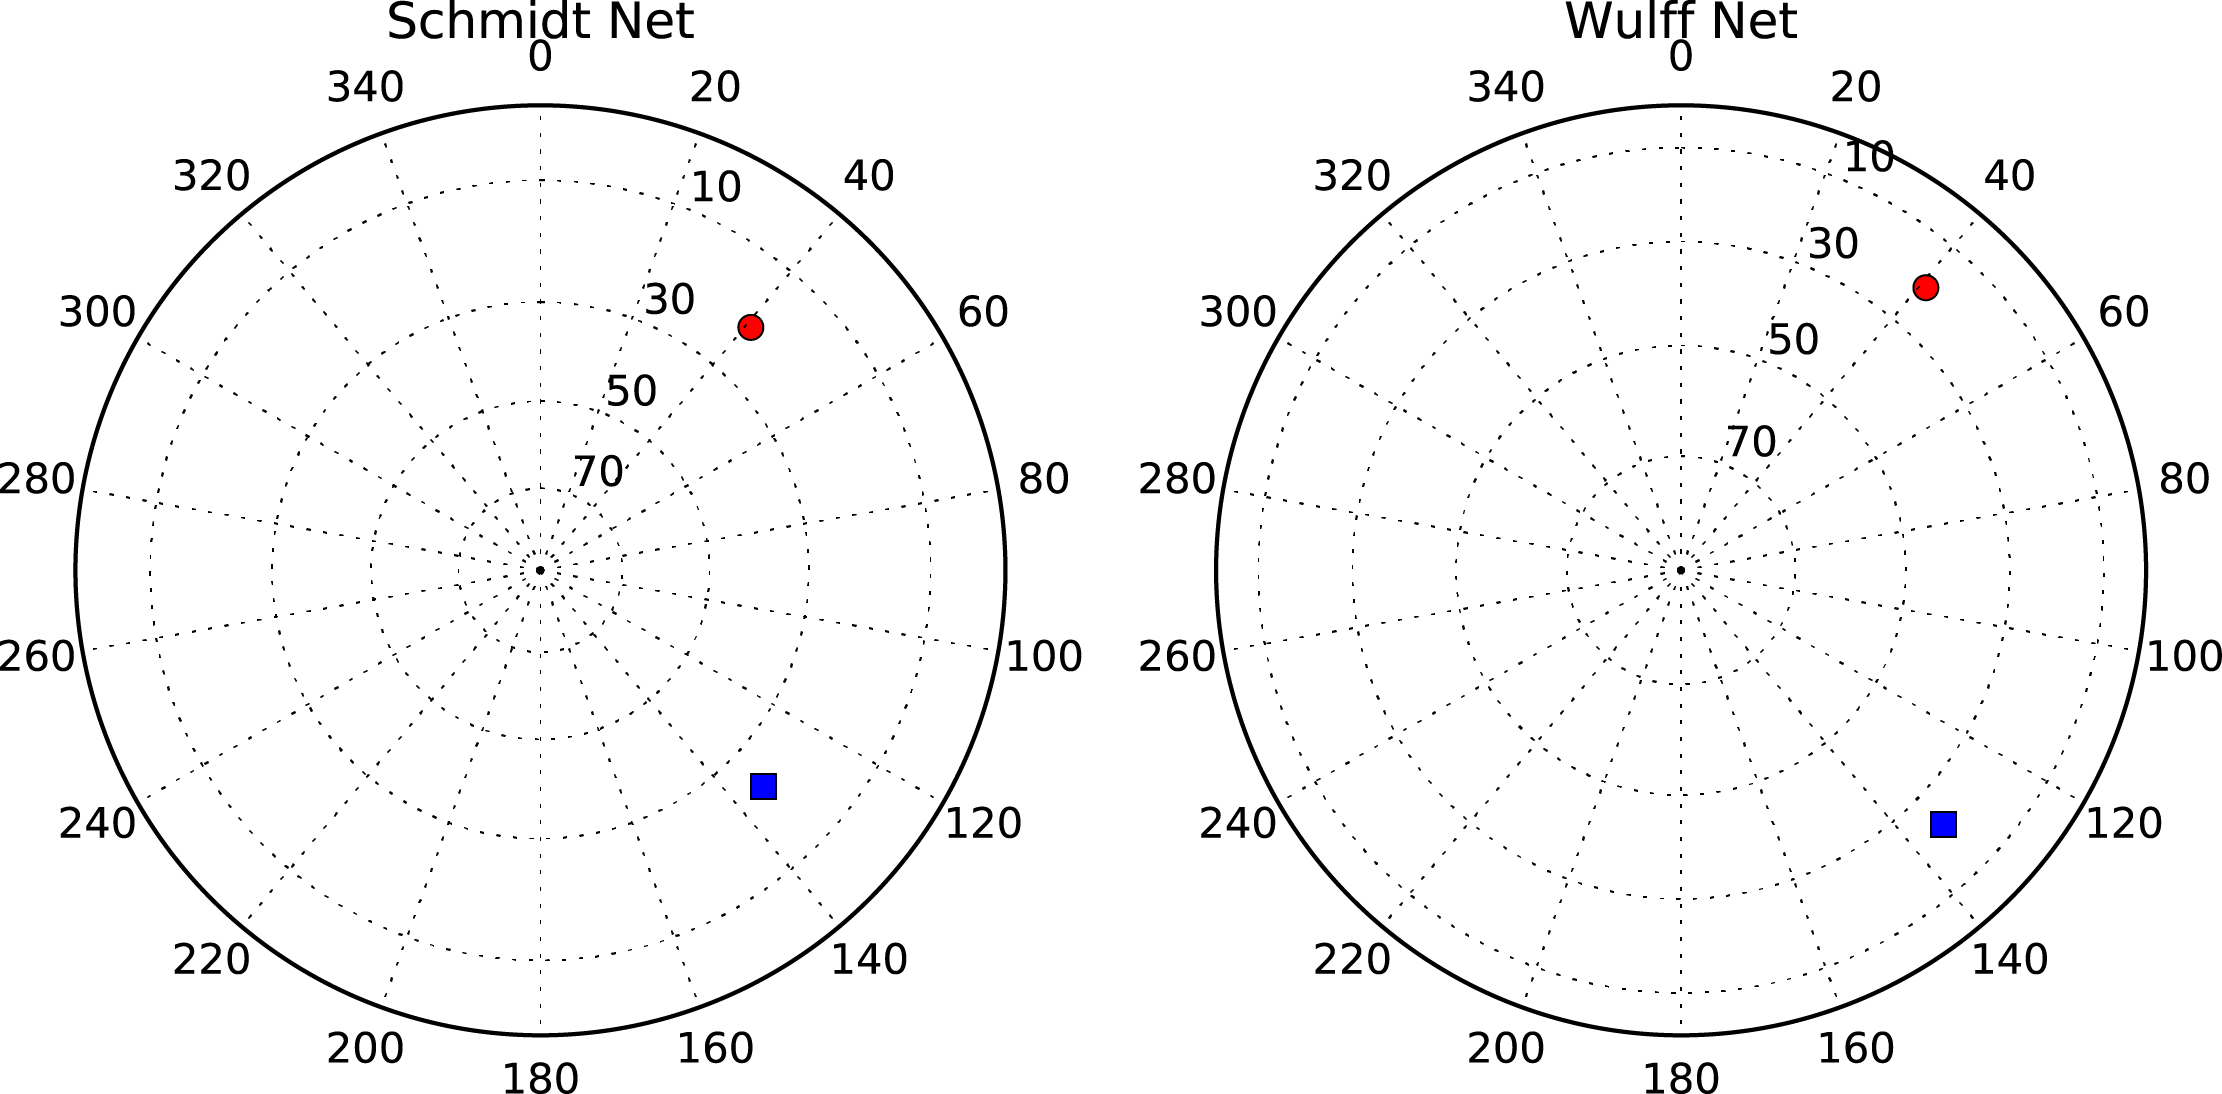

In [12]:
Image(filename='Figures/schmidt_wulff.png',width=600)

The outer rim of each diagram is the horizontal plane and the centers of the plots are the vertical direction (either down or up). By convention, up directions are plotted with open symbols and downward pointing symbols are solid.  

To read the azimuth of the blue square in the Schmidt net, just count around the outer rim. The azimuth of the red dot is about $40^{\circ}$.  The plunge you read by counting from the outer rim toward the center. So, the blue square has a  plunge of about 20$^{\circ}$.  Doing the same for the Wulff net, you should get the same direction, even though it looks a little different.   The secret is in how the contours are drawn for each projection.

Now we will learn how to make these plots.  If you look closely at the rose diagram we made earlier, you will see that the bin count contours are equally spaced whereas in the Schmidt and Wulff projections, they are not.  The first is called a 'polar interval' projection as opposed to equal area or equal angle.  To make these plots, we can use **plt.polar( )** which makes polar projections.  



In [13]:
help(plt.polar)

Help on function polar in module matplotlib.pyplot:

polar(*args, **kwargs)
    Make a polar plot.
    
    call signature::
    
      polar(theta, r, **kwargs)
    
    Multiple *theta*, *r* arguments are supported, with format
    strings, as in :func:`~matplotlib.pyplot.plot`.



That is an example of a terrible doc string, by the way!


But we need to map the plunges from  equal intervals to the appropriate spacing for our desired projection.  It is just a bit of math.  

The math for the equal angle projection turns out to be:

map_pl=90  tan $({{(90-pl)}\over 2})$

and the same for the equal area projection is: 

map_pl =90 $\sqrt 2$ ${ \sin\bigr({{90-pl}\over {2}}\bigl)}$

Let's make two lambda functions - one (**EqualAngle**) which converts plunges using the equal angle mapping and the other (**EqualArea**) which does the same except for using the equal area mapping.  


In [14]:
# Here's the equal angle function
EqualAngle = lambda Pl: 90.*np.tan(np.radians(90.-Pl)/(2.))
# and the equal area function
EqualArea = lambda Pl: np.sqrt(2.)*90.*np.sin(np.radians(90.-Pl)/(2.))

Now we have  the tools we need to make these plot. We just need a way  to put on the plunge and azimuth contours (the dashed lines in the nets).  The radial lines required for marking contours are generated using the function 
**plt.thetagrids( )** which takes a list of azimuths (or thetas in matplotlib-ish) and a list of their labels.
The contour lines for plunge are generated using 
**plt.rgrids( )** which takes a list of plunges (or radii in matplotlib-ish) and their labels.   

So here we go:

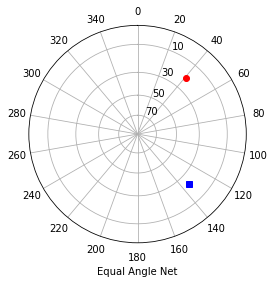

In [15]:
Azs=np.array([40.9,134.1]) # array of azimuths
Pls=np.array([20.7,22.5]) # array of corresponding plunges
# make a plot instance with polar axes
fig = plt.subplot(111, polar=True) 
# set the coordinates (like for rose diagrams)
fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
fig.set_theta_zero_location("N") # Specify 0-degrees as North
# for this we want the full 90 degrees, so set the scale
plt.polar([0],[90]) ## to scale grid
# plot the first direction as a red dot. note the use of the lambda function
plt.polar(np.radians(Azs)[0],(EqualAngle(Pls)[0]),'ro')
# plot the second direction as a blue square
plt.polar(np.radians(Azs)[1],(EqualAngle(Pls)[1]),'bs')

# make a list of contours to plot
# notice use of list comprehension
# label the azimuths at 20 degree intervals
AzContours=range(0,360,20)
AzLabels=[str(p) for p in AzContours]
plt.thetagrids(AzContours,AzLabels)

# and now the plunges
PlContours=[EqualAngle(a) for a in range(10,90,20)] ##don't include center or edge
# make a list of labels
PlLabels=[str(a) for a in range(10,90,20)]
# draw on the plunge contours and label them
plt.rgrids(PlContours,PlLabels)
# label the plot
plt.xlabel('Equal Angle Net');


Let's do the same thing for an equal area plot.  The only difference is the mapping of plunges using the **EqualArea( )** function instead of **EqualAngle( )**.  

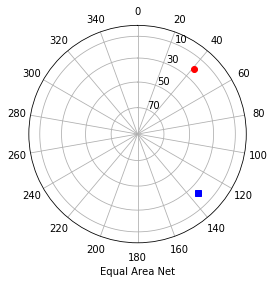

In [16]:
fig = plt.subplot(111, polar=True) # Specify polar axes

fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
fig.set_theta_zero_location("N") # Specify 0-degrees as North
plt.polar([0],[90]) ## to scale grid
plt.polar(np.radians(Azs)[0],EqualArea(Pls)[0],'ro')
plt.polar(np.radians(Azs)[1],EqualArea(Pls)[1],'bs')
AzContours=range(0,360,20)
AzLabels=[str(p) for p in AzContours]
plt.thetagrids(AzContours,AzLabels)
PlContours=[EqualArea(a) for a in range(10,90,20)]
PlLabels=[str(a) for a in range(10,90,20)]
plt.rgrids(PlContours,PlLabels)
plt.xlabel('Equal Area Net');

Tada!

### Assignment #7

In 1600, William Gilbert hypothesized that the Earth itself was a giant bar magnetic and that this gave rise to the Earth's **magnetic field**!  If it were true- that the source of the magnetic field behaved like a giant bar magnet- then the **inclination** of the **magnetic field** would vary as a function of latitude. 

**Inclination** is the angle between the horizontal and the direction of the field.   If the field were generated by a bar magnet, then the **inclination** would be horizontal (0 $^\circ$) at the magnetic equator and vertical ($\pm 90 ^\circ$) at the North and South poles. The equation that relates **inclination** ($I$) and latitude ($\lambda$) is:

$$ \tan I = 2 \tan \lambda \quad \quad(dipole\  equation)$$        

### 1. Inclinations

- Calculate the inclination at every latitude using the dipole equation:

    -  Write a function that calculates inclination (use the dipole equation)

    -  Apply the function you wrote to latitudes ranging from -90 to +90 at one degree intervals.  
    - \[**Hint:** Remember that **np.tan( )**  and **np.arctan( )** work in radians and your plot should be in degrees.\]   
    

- Calculate the actual inclination at every latitude in your birth year:

    - Use the function **magMap( )** to evaluate the magnetic field for the year you were born

    - Use **meshgrid( )** to make a 2-D array of the latitudes and longitudes that were returned from **magMap( )**

    - Transpose the new 2-D latitude array and then flatten the transposed array into a 1D array

    - Transpose the inclination array that was returned by **magMap( )** and then flatten it into a 1D array.  

    - Use the function **np.polyfit( )** to calculate a best fitting 3rd order polynomial through the data

    - Use **np.polyval()** to evaluate the curve at all the latitudes


- Compare the inclination that we expect from a bar magnet (calculated in 7.1) to the actual inclination in your birth year (calculated in 7.2) 

    - Plot the latitudes and inclinations that you calculated in 7.1. Plot the data points as a red line and label this  'Ideal GAD'
        
    - Plot the latitude against the inclinations you calculated in 7.2 as blue stars. Label the points with the year of your birth

    - Plot the best fitting curve you evaluated in 7.2 as large white squares with black rims and label this  'Best fit'.

    - Add a legend, title, x-axis, and y-axis to your figure

###  2. 2D Histograms,  KDE plots and maps
- Read the data file "Datasets/WUS_navdat.txt" into a pandas DataFrame
- Find all the igneous units with ages less than 6 Ma (Plio-Pleistosene).
- Make a 2-D histogram of volcano locations in the Seattle area
    - Filter the data to be between 40 and 50 degrees latitude and -124 and -110 longitude
    - make **NumPy** arrays for the latitude and longitude values
    - make a matplotlib figure (plt.figure()) with height and width both 10
    - a heat map is really a 2d histogram in color and there is a handy function in **matplotlib** that makes a  plot called plt.hist2d().  Look at the help message for that function.
    - call **plt.hist2d()** with  your longitude, latitude arrays as x and y and 25 bins.
    - label your x and y axes Longitude and Latitude respectively. 
    - make a big red star (markersize=25) at the location of Seattle (47.61N,122.33W).  
    - give your plot the title "Volcano density near Seattle" 
- Make the same figure, but this time use the seaborn function **sns.kdeplot()**. Use the argument **shade=True** to fill in your contours.

### 3.  Equal area projections
Plot some directions measured in the field on an equal area projection

- Read in the data from Datasets/directions.txt. The first column is the azimuth and the second is the plunge.
- Plot the downward directions (positive plunges) as red circles.
- Plot the upward directions (negative plunges) as white squares with black edges.  